# APPLYING IMAGE FILTERS

In this exercise, we will apply filters on images to see their effect. This is important to see how Convolutional Neural Networks (CNNs) learn.

**a) Load the MNIST fashion dataset ([https://www.tensorflow.org/datasets/catalog/fashion\_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist)) and scale the data to the range of \[0,1].**

**b) Select five images randomly from the training set and apply the following convolutions (using the library scipy.ndimage) on the original image:**

1.  `[[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]`
2.  `[[-1 ,2, -1], [-1, 2, -1], [-1, 2, -1]]`
3.  `[[-1, -1, 2], [-1, 2, -1], [2, -1, -1]]`

**c) Visualize side-by-side comparisons of the transformed images and the original images. What are the convolutions highlighting?**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.ndimage import convolve

In [3]:
# a) Load the Fashion MNIST dataset and scale the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0  # Scale to [0, 1]
test_images = test_images.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# b) Select five random images from the training set
random_indices = np.random.choice(train_images.shape[0], 5, replace=False)
original_images = train_images[random_indices]

# Define the convolution filters
filters = [
    np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]),  # Filter 1
    np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),  # Filter 2
    np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])   # Filter 3
]

# Apply the filters to the original images
filtered_images = [convolve(image, filter, mode='constant') for image in original_images for filter in filters]

# Reshape filtered_images for visualization
filtered_images = np.array(filtered_images).reshape(5, 3, 28, 28)

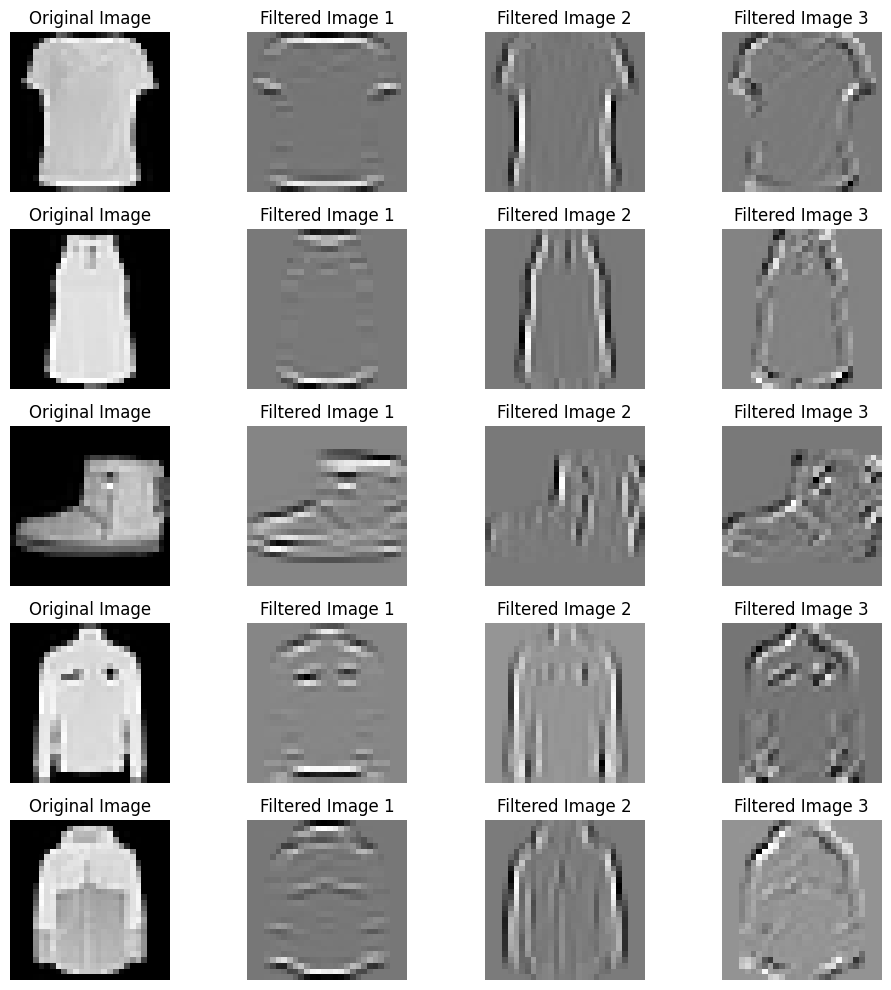

In [5]:
# c) Visualize side-by-side comparisons
fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i in range(5):
    # Original image
    axes[i, 0].imshow(original_images[i], cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Filtered images
    for j in range(3):
        axes[i, j + 1].imshow(filtered_images[i, j], cmap='gray')
        axes[i, j + 1].set_title(f'Filtered Image {j + 1}')
        axes[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

Explanation of what the convolutions highlight:

- The first filter highlights horizontal edges.
- The second filter highlights vertical edges.
- The third filter detects certain diagonal patterns.

---


# CONVOLUTIONAL NEURAL NETWORKS WITH KERAS

This exercise works with custom CNN architectures that are suited for image classification.

**a) Load the MNIST fashion dataset ([https://www.tensorflow.org/datasets/catalog/fashion\_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist)) and scale the data to the range of \[0,1].**

**b) Build a simple CNN with the following layers, print a summary of the structure, train it with appropriate parameters for five epochs, and evaluate it on the training set:**

1.  A reshape layer that adds a third dimension to the images.
2.  Two convolutional layers (128 and 64 filters with a 3x3 kernel size). Explain the output shapes printed in the summary.
3.  A flatten layer followed by two dense layers with 64 neurons and 10 neurons, respectively. The last dense layer should have a softmax activation.

**c) Add a max-pooling layer after every convolution (pool size of 2x2) and compare the performance of the new model with the old one.**

*   Is it performing better?
*   Why is pooling a good chance for performance improvements?

In [6]:
# a) Load the Fashion MNIST dataset and scale the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0  # Scale to [0, 1]
test_images = test_images.astype('float32') / 255.0

In [7]:
# b) Build a simple CNN
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print model summary
model.summary()

# Explanation of output shapes:
# - After the first Conv2D layer (128 filters): Output shape is (None, 26, 26, 128).
#   Formula: (input_dim - kernel_size + 1) for each spatial dimension.
# - After the second Conv2D layer (64 filters): Output shape is (None, 24, 24, 64).
# - After Flatten: Output shape is (None, 64*24*24).

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Model - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

2024-08-14 14:46:25.597433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 14:46:25.694497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 14:46:25.694817: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 64)                2359360   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2435082 (9.29 MB)
Trainable params: 243508

2024-08-14 14:46:33.264794: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-08-14 14:46:36.541927: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9d062ced50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-14 14:46:36.542269: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P5000, Compute Capability 6.1
2024-08-14 14:46:36.551863: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1723646796.740099     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 22s 6ms/step - loss: 0.3690 - accuracy: 0.8670 - val_loss: 0.2992 - val_accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2327 - accuracy: 0.9150 - val_loss: 0.2572 - val_accuracy: 0.9058
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1727 - accuracy: 0.9360 - val_loss: 0.2506 - val_accuracy: 0.9160
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1230 - accuracy: 0.9536 - val_loss: 0.2827 - val_accuracy: 0.9135
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0854 - accuracy: 0.9680 - val_loss: 0.3067 - val_accuracy: 0.9162
Model - Training accuracy: 0.9837, Testing accuracy: 0.9162


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4558 - accuracy: 0.8335 - val_loss: 0.3476 - val_accuracy: 0.8720
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3038 - accuracy: 0.8887 - val_loss: 0.2994 - val_accuracy: 0.8924
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2613 - accuracy: 0.9031 - val_loss: 0.2807 - val_accuracy: 0.8978
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2306 - accuracy: 0.9147 - val_loss: 0.2713 - val_accuracy: 0.9013
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2077 - accuracy: 0.9227 - val_loss: 0.2732 - val_accuracy: 0.8992
Model with Pooling - Training accuracy: 0.9337, Testing accuracy: 0.8992
Improvement in testing accuracy: -0.0170


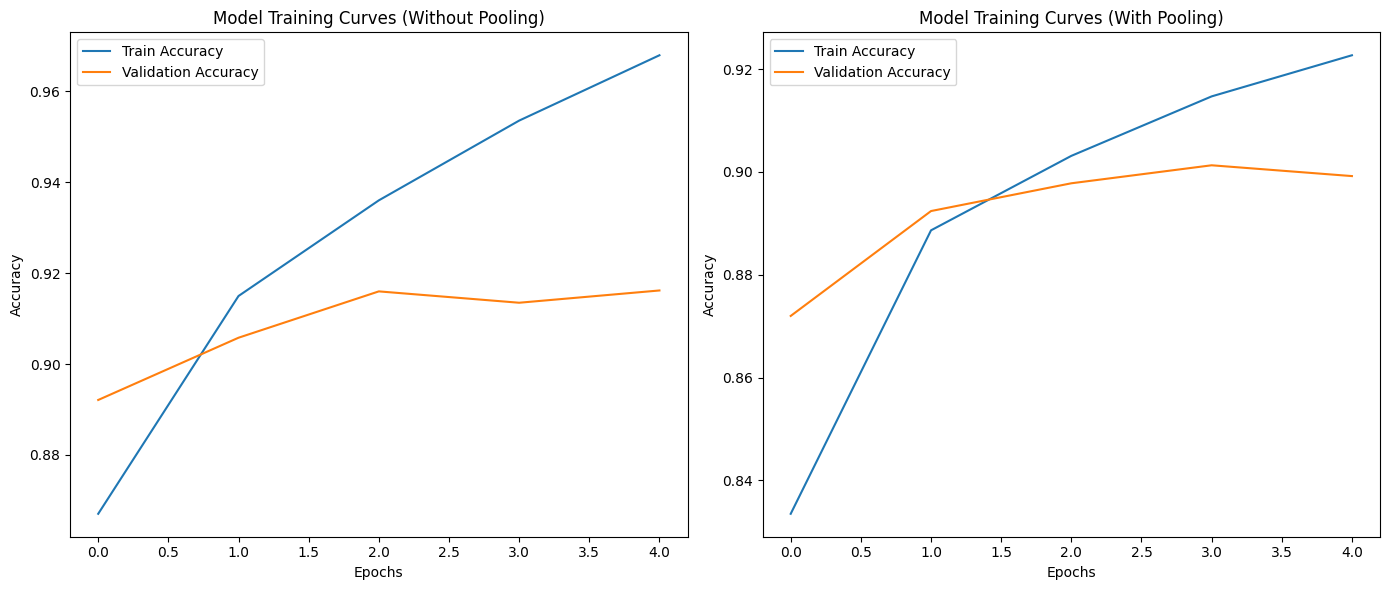

In [8]:
# c) Add max-pooling layer after every convolution
model_with_pooling = keras.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the new model
model_with_pooling.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the new model
history_pooling = model_with_pooling.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the new model
train_loss_pooling, train_acc_pooling = model_with_pooling.evaluate(train_images, train_labels, verbose=0)
test_loss_pooling, test_acc_pooling = model_with_pooling.evaluate(test_images, test_labels, verbose=0)
print(f'Model with Pooling - Training accuracy: {train_acc_pooling:.4f}, Testing accuracy: {test_acc_pooling:.4f}')

# Comparison
print(f'Improvement in testing accuracy: {test_acc_pooling - test_acc:.4f}')

# Why is pooling effective?
# Pooling reduces the spatial dimensions, which decreases the number of parameters and computations in the network.
# It helps to prevent overfitting by providing an abstracted form of the representation and retaining the most important features.

# Visualize training curves
plt.figure(figsize=(14, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Curves (Without Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training accuracy for the pooling model
plt.subplot(1, 2, 2)
plt.plot(history_pooling.history['accuracy'], label='Train Accuracy')
plt.plot(history_pooling.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Curves (With Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# USING PRE-TRAINED CONVOLUTIONAL NEURAL NETWORKS

In this exercise, we will look at CNNs from a different point of view. We use a pre-trained TensorFlow model for the CIFAR-10 dataset ([https://www.cs.toronto.edu/\~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)).

**a) Fetch the CIFAR-10 dataset from Keras datasets and scale the images to the range of \[0,1].**

**b) Load the pre-trained model from Tensorflow Hub as a Keras layer ([https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1](https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1)).**

*   Inspect the loaded model. Can you see its structure?

**c) Predict the classes for three exemplary images and visualize the predicted probabilities for each class.**

**d) Evaluate the accuracy of the model on the test images. You should split the data into smaller pieces to avoid OOM errors.**

**e) How could this model be used for transfer learning?**


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Scale images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 2s 0us/step


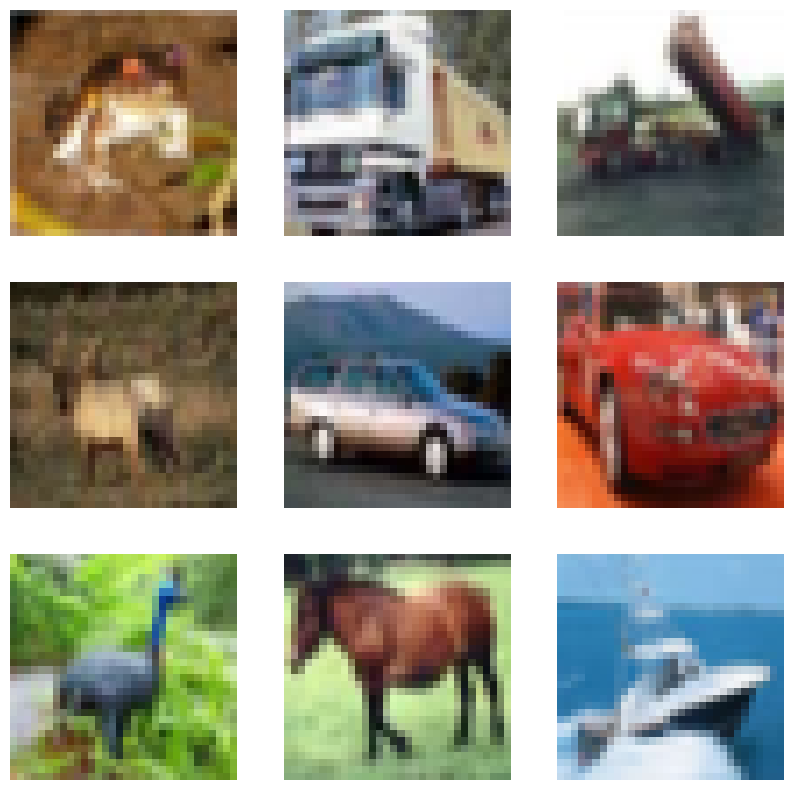

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [13]:
import tensorflow_hub as hub

# Load the pre-trained model as a Keras layer
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1", input_shape=(32, 32, 3))
])

# Inspect the model structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 10)                7796426   
                                                                 
Total params: 7796426 (29.74 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 7796426 (29.74 MB)
_________________________________________________________________


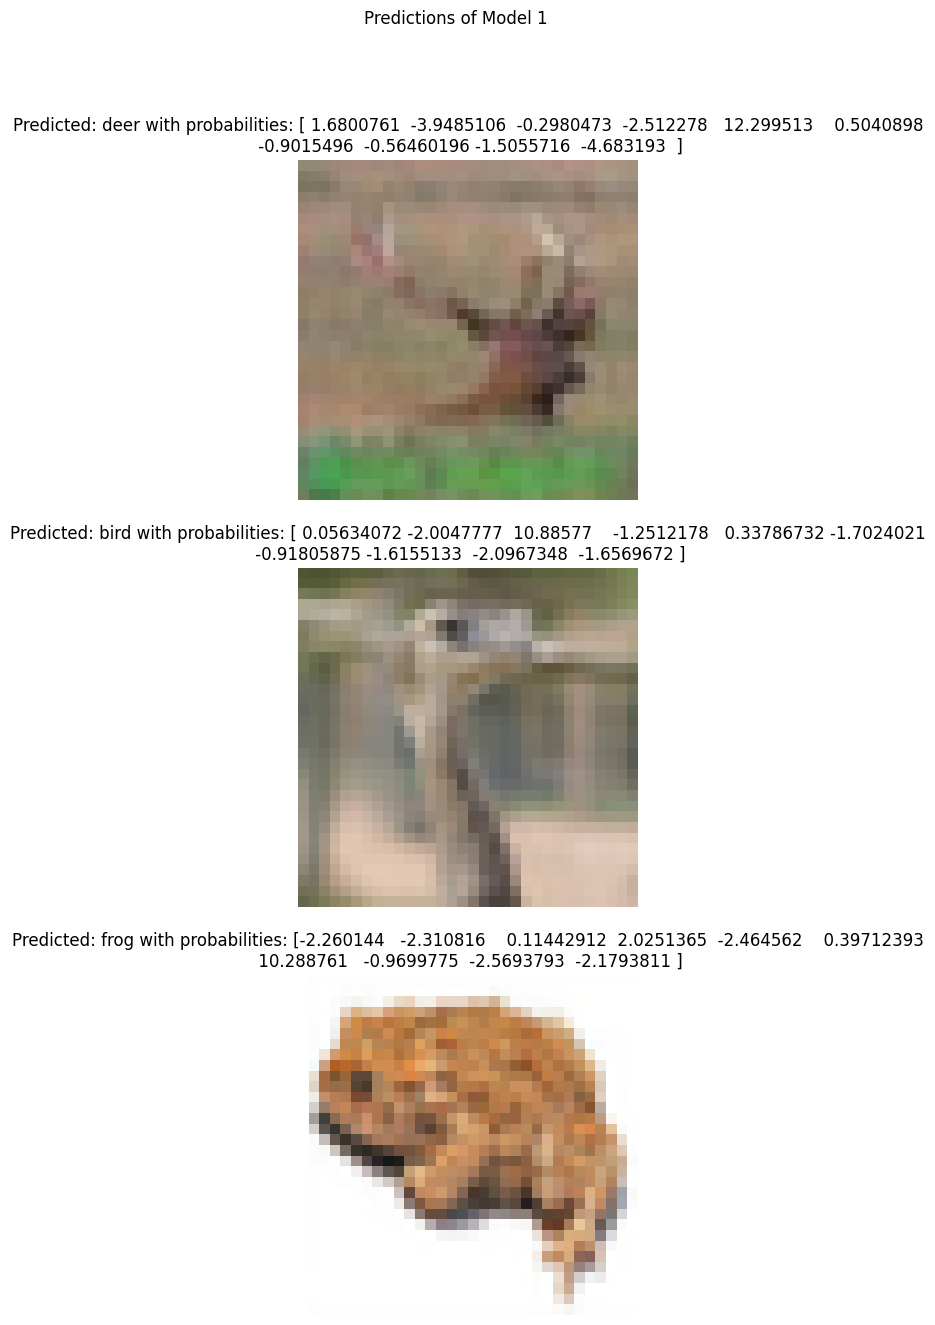

In [33]:
# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select three random images from the test set
sample_indices = np.random.choice(x_test.shape[0], 3, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict classes
predictions = model(sample_images)
    
plt.figure(figsize=(10, 15))
plt.suptitle('Predictions of Model 1')
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.imshow(sample_images[i])
    predicted_class = np.argmax(predictions[i].numpy())
    plt.title(f"Predicted: {class_labels[predicted_class]} with probabilities: {predictions[i].numpy()}")
    plt.axis('off')
plt.show()

In [24]:
# Evaluate model on test set in smaller batches
batch_size = 32
test_accuracy = tf.keras.metrics.Accuracy()

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i + batch_size]
    y_batch = y_test[i:i + batch_size]
    
    predictions = model(x_batch)
    predicted_classes = tf.argmax(predictions, axis=1)
    test_accuracy.update_state(y_batch, predicted_classes)

print(f"Test accuracy: {test_accuracy.result().numpy() * 100:.2f}%")

Test accuracy: 94.52%


This model can be used for transfer learning by:

Feature Extraction: Use the pre-trained model to extract features from images. Freeze the model layers and add new layers on top for a specific task.

Fine-tuning: Unfreeze some of the layers of the pre-trained model and retrain them alongside the new layers on a specific dataset to improve performance.

Domain Adaptation: Adapt the model to a related domain by retraining it with a smaller dataset specific to that domain.

---


# MANUAL CONVOLUTIONS AND POOLING

In this exercise, we will manually perform convolutions and pooling operations. Implement two methods (one for convolutions and one for pooling) and test your methods with some data.

**a) Convolutions:**

*   Implement a method that takes an input matrix (assume a 2D array which has the same number of rows and columns) and a kernel matrix (assume a 2D array that has the same number of rows and columns).
*   Perform the convolution operation by applying the kernel matrix to the input matrix. Assume that overlapping is desired, i.e., a stride of (1,1).

**b) Max-Pooling:**

*   Implement a method that takes an input matrix (assume a 2D array which has the same number of rows and columns) and an integer number that specifies the edge length of the pool matrix (assume a 2D array which has the same number of rows and columns).
*   Perform the max-pooling operation to the input matrix. Assume that overlapping is desired, i.e., a stride of (1,1).

**c) Test both methods with a few examples.**

In [25]:
# a) Convolution function
def manual_convolution(input_matrix, kernel):
    kernel_size = kernel.shape[0]
    output_size = input_matrix.shape[0] - kernel_size + 1
    output_matrix = np.zeros((output_size, output_size))

    for i in range(output_size):
        for j in range(output_size):
            output_matrix[i, j] = np.sum(input_matrix[i:i + kernel_size, j:j + kernel_size] * kernel)

    return output_matrix

In [26]:
# b) Max-Pooling function
def manual_max_pooling(input_matrix, pool_size):
    output_size = input_matrix.shape[0] - pool_size + 1
    output_matrix = np.zeros((output_size, output_size))

    for i in range(output_size):
        for j in range(output_size):
            output_matrix[i, j] = np.max(input_matrix[i:i + pool_size, j:j + pool_size])

    return output_matrix

In [27]:
# c) Testing the functions with examples
input_matrix = np.array([[1, 2, 3, 0],
                         [4, 5, 6, 1],
                         [7, 8, 9, 2],
                         [0, 1, 2, 3]])

kernel = np.array([[1, 0],
                   [0, -1]])

# Test convolution
conv_result = manual_convolution(input_matrix, kernel)
print("Convolution Result:\n", conv_result)

# Test max-pooling
pool_size = 2
pool_result = manual_max_pooling(input_matrix, pool_size)
print("Max Pooling Result:\n", pool_result)

Convolution Result:
 [[-4. -4.  2.]
 [-4. -4.  4.]
 [ 6.  6.  6.]]
Max Pooling Result:
 [[5. 6. 6.]
 [8. 9. 9.]
 [8. 9. 9.]]
